# Код

In [2]:
from pandas import DataFrame
from math import exp, ceil
from typing import Callable

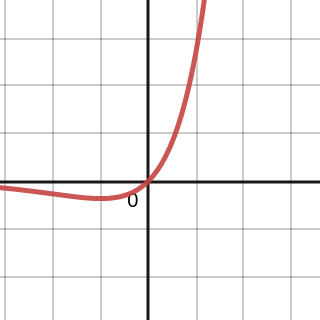

In [3]:
def f(x: float) -> float:
  return x*exp(x)

def F(x: float, C = 0) -> float:
  return exp(x)*x - exp(x) + C

Левые прямоугольников

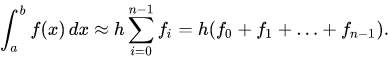

Правые прямоугольников

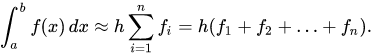

In [4]:
def rectangle(a: float, b: float, f: Callable[[float], float], parts: int, method: int = 0) -> float:
  # method = 0 левые
  # method = 1 правые
  h = (b - a) / parts
  first = method * h + a
  summ = sum([f(first + i * h) for i in range(parts)])
  return h * summ


формула Симпсона (Обычно для равномерной сетки данную формулу записывают в других обозначениях (отрезок [a,b] разбит на N отрезков) в виде)

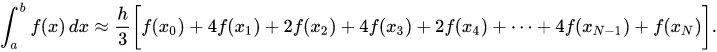

In [5]:
def simpson(a: float, b: float, f: Callable[[float], float], parts: int) -> float:
  h = (b - a) / parts
  summ = f(a) + f(b) + 4 * f(a + h)
  for i in range(1, ceil(parts / 2)):
    summ += 2 * f(a + 2 * i * h) + 4 * f(a + (2*i+1) * h)

  return summ * h / 3
# def simpson(a: float, b: float, f: Callable[[float], float], parts: int) -> float:


метод трапеции

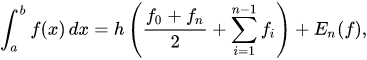

причём для погрешности справедлива оценка **(не сделано)**

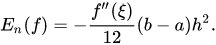

In [6]:
def trapezoid(a: float, b: float, f: Callable[[float], float], parts: int) -> float:
  h = (b - a) / parts
  summ = (f(a) + f(b)) / 2
  for i in range(1, parts):
    summ += f(a + i * h)

  return summ * h

In [7]:
N = 16
a = -1
b = 1

analytical = [F(b) - F(a)] * 4

Ns = ["N", "2N", "5N", "10N"]

leftRect = [rectangle(a, b, f, N, 0),
            rectangle(a, b, f, 2*N, 0),
            rectangle(a, b, f, 5*N, 0),
            rectangle(a, b, f, 10*N, 0),]

rightRect = [rectangle(a, b, f, N, 1),
            rectangle(a, b, f, 2*N, 1),
            rectangle(a, b, f, 5*N, 1),
            rectangle(a, b, f, 10*N, 1),]

trap = [trapezoid(a, b, f, N),
        trapezoid(a, b, f, 2*N),
        trapezoid(a, b, f, 5*N),
        trapezoid(a, b, f, 10*N),]

simp = [simpson(a, b, f, N),
        simpson(a, b, f, 2*N),
        simpson(a, b, f, 5*N),
        simpson(a, b, f, 10*N),]

df = DataFrame(list(zip(Ns, analytical, leftRect, rightRect, trap, simp)), columns=['Разделение', 'Аналитическое', 'Левые Прямоугольники', 'Правые Прямоугольники', 'Трапеции', 'Симпсон'])
df

,Разделение,Аналитическое,Левые Прямоугольники,Правые Прямоугольники,Трапеции,Симпсон
0,N,0.735759,0.549949,0.935719,0.742834,0.735773
1,2N,0.735759,0.641086,0.833971,0.737528,0.735760
2,5N,0.735759,0.697465,0.774619,0.736042,0.735759
3,10N,0.735759,0.716541,0.755118,0.735830,0.735759


**Погрешность для левых прямоугольников**

In [8]:
res = []
analytical = F(b) - F(a)

for i in range(1, 5000):
  temp = []
  temp.append(i)
  temp.append(analytical)
  temp.append(rectangle(a, b, f, i, 0))
  diff = abs(temp[1] - temp[2])
  if diff < 10**-3:
    temp.append(diff)
    res.append(temp)
    break
  else:
    del temp

df = DataFrame(res, columns=['M', 'Аналитическое', 'Левые прямоугольники', 'Погрешность'])
df

,M,Аналитическое,Левые прямоугольники,Погрешность
0,3086,0.735759,0.734759,0.001


**Погрешность для правых прямоугольников**

In [9]:
res = []
analytical = F(b) - F(a)

for i in range(1, 5000):
  temp = []
  temp.append(i)
  temp.append(analytical)
  temp.append(rectangle(a, b, f, i, 1))
  diff = abs(temp[1] - temp[2])
  if diff < 10**-3:
    temp.append(diff)
    res.append(temp)
    break
  else:
    del temp

df = DataFrame(res, columns=['M', 'Аналитическое', 'Правые прямоугольники', 'Погрешность'])
df

,M,Аналитическое,Правые прямоугольники,Погрешность
0,3087,0.735759,0.736759,0.001


**Погрешность для метода трапеции**

In [10]:
res = []
analytical = F(b) - F(a)

for i in range(1, 5000):
  temp = []
  temp.append(i)
  temp.append(analytical)
  temp.append(trapezoid(a, b, f, i))
  diff = abs(temp[1] - temp[2])
  if diff < 10**-3:
    temp.append(diff)
    res.append(temp)
    break
  else:
    del temp

df = DataFrame(res, columns=['M', 'Аналитическое', 'Метод трапеции', 'Погрешность'])
df

,M,Аналитическое,Метод трапеции,Погрешность
0,43,0.735759,0.736739,0.00098


**Погрешность для метода Симпсона**

In [11]:
res = []
analytical = F(b) - F(a)

for i in range(1, 5000):
  temp = []
  temp.append(i)
  temp.append(analytical)
  temp.append(simpson(a, b, f, i))
  diff = abs(temp[1] - temp[2])
  if diff < 10**-3:
    temp.append(diff)
    res.append(temp)
    break
  else:
    del temp

df = DataFrame(res, columns=['M', 'Аналитическое', 'Метод Симпсона', 'Погрешность'])
df

,M,Аналитическое,Метод Симпсона,Погрешность
0,6,0.735759,0.736441,0.000682


***Выводы***

Методом Симпсона для данной функции очень быстро находится приближение.

Рейтинг
 - Симпсон
 - Трапеция 
 - Левые и Правые прямоугольники

# Заметки

    # Можно сделать через полный цикл, но так в принципе тоже "красиво"
    # range(1, parts)
    # if i%2
    #   m = 4
    # else 
    #   m = 2
    # sum += m * f(a + i * h)